# Task 8.3 QASM3 with Qiskit SDK

## Objective 1: Interact with the Qiskit IBM Runtime REST API

### Import QASM3 file into qiskit
* install qiskit-qasm3-import

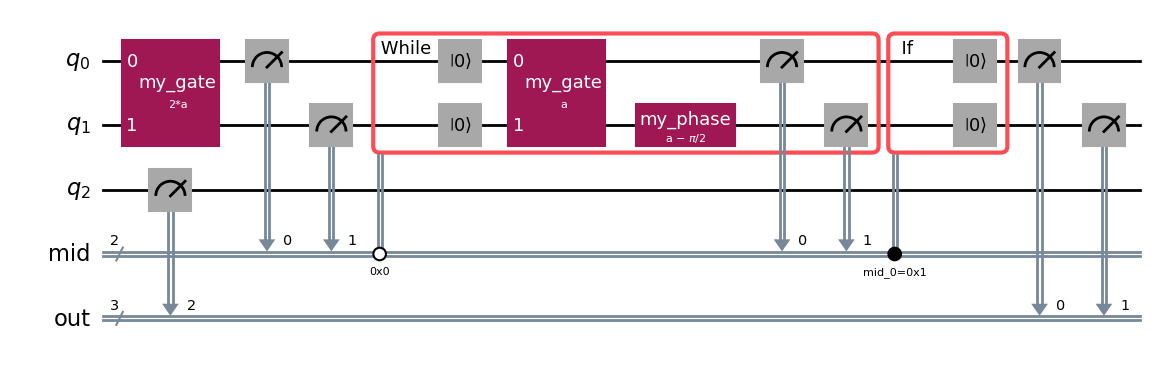

In [1]:
import qiskit.qasm3
 
program = """
    OPENQASM 3.0;
    include "stdgates.inc";
 
    input float[64] a;
    qubit[3] q;
    bit[2] mid;
    bit[3] out;
 
    let aliased = q[0:1];
 
    gate my_gate(a) c, t {
      gphase(a / 2);
      ry(a) c;
      cx c, t;
    }
    gate my_phase(a) c {
      ctrl @ inv @ gphase(a) c;
    }
 
    my_gate(a * 2) aliased[0], q[{1, 2}][0];
    measure q[0] -> mid[0];
    measure q[1] -> mid[1];
 
    while (mid == "00") {
      reset q[0];
      reset q[1];
      my_gate(a) q[0], q[1];
      my_phase(a - pi/2) q[1];
      mid[0] = measure q[0];
      mid[1] = measure q[1];
    }
 
    if (mid[0]) {
      let inner_alias = q[{0, 1}];
      reset inner_alias;
    }
 
    out = measure q;
"""
circuit = qiskit.qasm3.loads(program)
circuit.draw("mpl")

### Export to QASM3

In [2]:
from qiskit import QuantumCircuit
from qiskit.qasm3 import dumps
 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
 
dumps(qc)

'OPENQASM 3.0;\ninclude "stdgates.inc";\nbit[2] meas;\nqubit[2] q;\nh q[0];\ncx q[0], q[1];\nbarrier q[0], q[1];\nmeas[0] = measure q[0];\nmeas[1] = measure q[1];\n'

In [3]:
from qiskit import QuantumCircuit
from qiskit.qasm3 import dump
 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
 
f = open("sample_qasm.txt", "w")
dump(qc, f)
f.close()